In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (9, 7)
plt.rcParams['font.size'] = 14

### Import dateset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving data_clean.csv to data_clean.csv


In [3]:
df = pd.read_csv("/content/data_clean.csv", index_col=0)
df

,SEQN,Gender,Age,Race,CountryofBirth,Education,FamIncomeRatio,Weight,Height,BMI,Diabetes,ModerateWorkActivity,ModerateRecreationalActivities,Depressed,PoorAppetiteOvereating,Smoking,SleepHoursWeekdays,SleepHoursWeekend
1,109264,2,13,1,1,NaN,0.83,42.2,154.7,17.6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,109265,1,2,3,1,NaN,3.06,12.0,89.3,15.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,109266,2,29,6,2,5.0,5.00,97.1,160.2,37.8,2,2.0,1.0,5.397605e-79,5.397605e-79,NaN,7.5,8.0
7,109270,2,11,4,1,NaN,1.88,75.3,156.0,30.9,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,109271,1,49,3,1,2.0,NaN,98.8,182.3,29.7,2,1.0,2.0,1.000000e+00,5.397605e-79,1.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15555,124818,1,40,4,1,5.0,3.82,108.8,168.7,38.2,2,2.0,2.0,5.397605e-79,5.397605e-79,NaN,6.0,7.0
15556,124819,1,2,4,1,NaN,0.07,15.4,93.7,17.5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15557,124820,2,7,3,1,NaN,1.22,22.9,123.3,15.1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15558,124821,1,63,4,1,2.0,3.71,79.5,176.4,25.5,3,2.0,2.0,5.397605e-79,5.397605e-79,NaN,8.0,9.0


In [4]:
df.shape

(13137, 18)

In [5]:
df

,SEQN,Gender,Age,Race,CountryofBirth,Education,FamIncomeRatio,Weight,Height,BMI,Diabetes,ModerateWorkActivity,ModerateRecreationalActivities,Depressed,PoorAppetiteOvereating,Smoking,SleepHoursWeekdays,SleepHoursWeekend
1,109264,2,13,1,1,NaN,0.83,42.2,154.7,17.6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,109265,1,2,3,1,NaN,3.06,12.0,89.3,15.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,109266,2,29,6,2,5.0,5.00,97.1,160.2,37.8,2,2.0,1.0,5.397605e-79,5.397605e-79,NaN,7.5,8.0
7,109270,2,11,4,1,NaN,1.88,75.3,156.0,30.9,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,109271,1,49,3,1,2.0,NaN,98.8,182.3,29.7,2,1.0,2.0,1.000000e+00,5.397605e-79,1.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15555,124818,1,40,4,1,5.0,3.82,108.8,168.7,38.2,2,2.0,2.0,5.397605e-79,5.397605e-79,NaN,6.0,7.0
15556,124819,1,2,4,1,NaN,0.07,15.4,93.7,17.5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15557,124820,2,7,3,1,NaN,1.22,22.9,123.3,15.1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15558,124821,1,63,4,1,2.0,3.71,79.5,176.4,25.5,3,2.0,2.0,5.397605e-79,5.397605e-79,NaN,8.0,9.0


#### Filter the age, extract respondents from 20-60 years old.


In [6]:
# Filter the age, extract respondents from 20-60 years old.
df_age_filter = df[(df['Age'] >= 20) & (df['Age'] <= 60)]
print(df_age_filter.head())
print(df_age_filter.shape)

      SEQN  Gender  Age  ...  Smoking  SleepHoursWeekdays  SleepHoursWeekend
3   109266       2   29  ...      NaN                 7.5                8.0
8   109271       1   49  ...      1.0                10.0               13.0
10  109273       1   36  ...      1.0                 6.5                8.0
21  109284       2   44  ...      NaN                 8.0               10.0
23  109286       2   33  ...      NaN                 8.5                9.0

[5 rows x 18 columns]
(5556, 18)


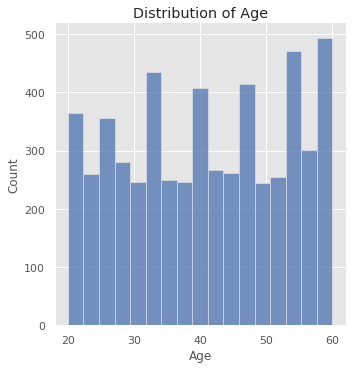

In [7]:
# Distribution of Age
sns.displot(df_age_filter['Age'],color='b')
plt.title("Distribution of Age")
plt.show()

#### Check if there is any null values

In [8]:
df_age_filter.isnull().sum()

SEQN                                 0
Gender                               0
Age                                  0
Race                                 0
CountryofBirth                       0
Education                            0
FamIncomeRatio                     755
Weight                               0
Height                               0
BMI                                  0
Diabetes                             0
ModerateWorkActivity                 0
ModerateRecreationalActivities       0
Depressed                          346
PoorAppetiteOvereating             346
Smoking                           3470
SleepHoursWeekdays                  41
SleepHoursWeekend                   48
dtype: int64

#### Fill in missing values with mean and median values.

In [9]:
df_age_filter['FamIncomeRatio'].fillna(df_age_filter['FamIncomeRatio'].mean(), inplace=True)
df_age_filter['Depressed'].fillna(df_age_filter['Depressed'].median(), inplace=True)
df_age_filter['PoorAppetiteOvereating'].fillna(df_age_filter['PoorAppetiteOvereating'].median(), inplace=True)
df_age_filter['Smoking'].fillna(df_age_filter['Smoking'].median(), inplace=True)
df_age_filter['SleepHoursWeekdays'].fillna(df_age_filter['SleepHoursWeekdays'].mean(), inplace=True)
df_age_filter['SleepHoursWeekend'].fillna(df_age_filter['SleepHoursWeekend'].mean(), inplace=True)

In [10]:
df_age_filter.isnull().any()

SEQN                              False
Gender                            False
Age                               False
Race                              False
CountryofBirth                    False
Education                         False
FamIncomeRatio                    False
Weight                            False
Height                            False
BMI                               False
Diabetes                          False
ModerateWorkActivity              False
ModerateRecreationalActivities    False
Depressed                         False
PoorAppetiteOvereating            False
Smoking                           False
SleepHoursWeekdays                False
SleepHoursWeekend                 False
dtype: bool

- Now we filled the missing values, we have no null values in our dataset.

### Visualization

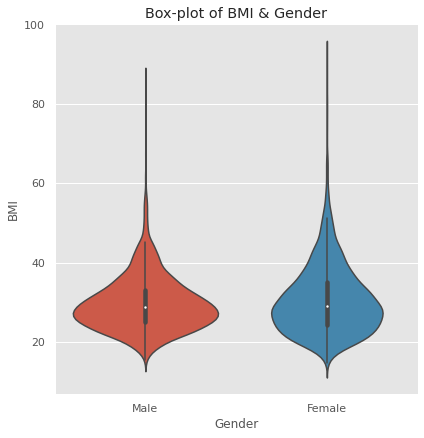

In [11]:
# BMI and Gender
b = sns.catplot(x="Gender", y="BMI", data=df_age_filter, height=6, kind='violin')
plt.xticks([0, 1],['Male','Female'])
plt.title('Box-plot of BMI & Gender')
plt.show()

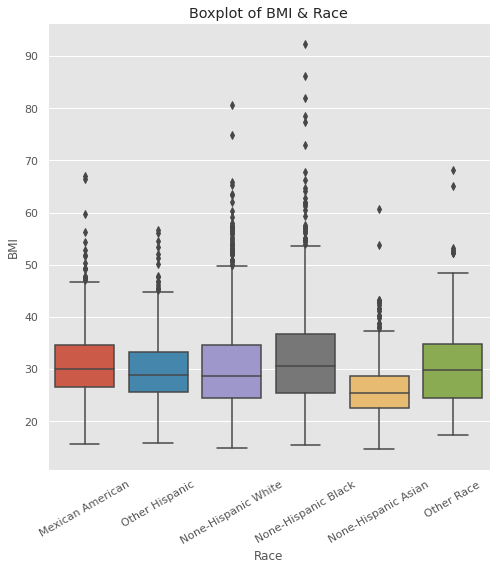

In [12]:
# BMI and Race
sns.catplot(x="Race", y='BMI', data=df_age_filter, kind='box', height=7)
plt.title('Boxplot of BMI & Race')
plt.xticks([0, 1, 2, 3, 4, 5],['Mexican American', 'Other Hispanic',
                                  'None-Hispanic White', 'None-Hispanic Black',
                                  'None-Hispanic Asian', 'Other Race'], rotation=30)
plt.show()

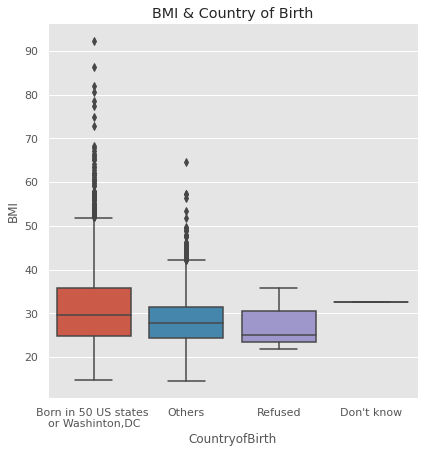

In [13]:
#BMI and Country of Birth
sns.catplot(data=df_age_filter, x="CountryofBirth", y="BMI", kind='box', height=6)
plt.title("BMI & Country of Birth")
plt.xticks([0,1,2,3],['Born in 50 US states \nor Washinton,DC', 'Others', 'Refused', "Don't know"])
plt.show()

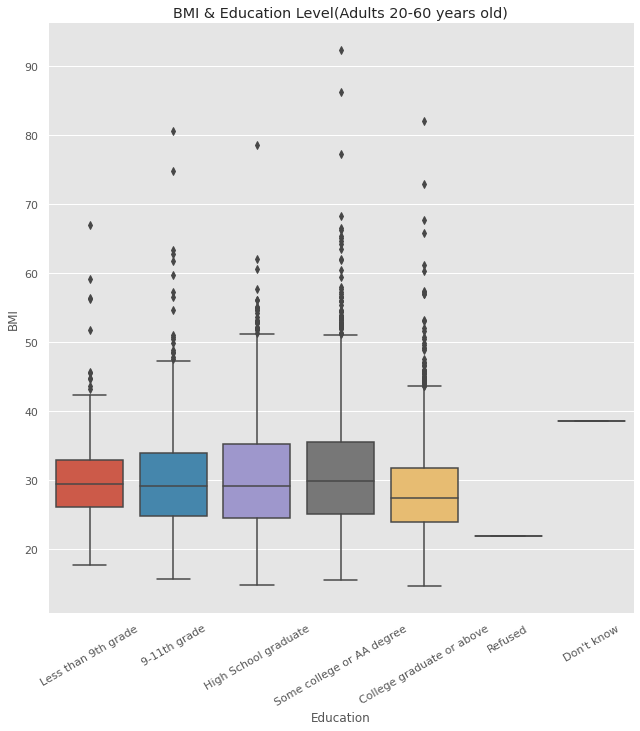

In [14]:
## BMI and Education Level
sns.catplot(data=df_age_filter, x="Education", y="BMI", kind='box', height=9)
plt.title("BMI & Education Level(Adults 20-60 years old)")
plt.xticks([0,1,2,3,4,5,6],['Less than 9th grade','9-11th grade','High School graduate',
                            'Some college or AA degree','College graduate or above',
                            'Refused',"Don't know"], rotation=30)
plt.show()

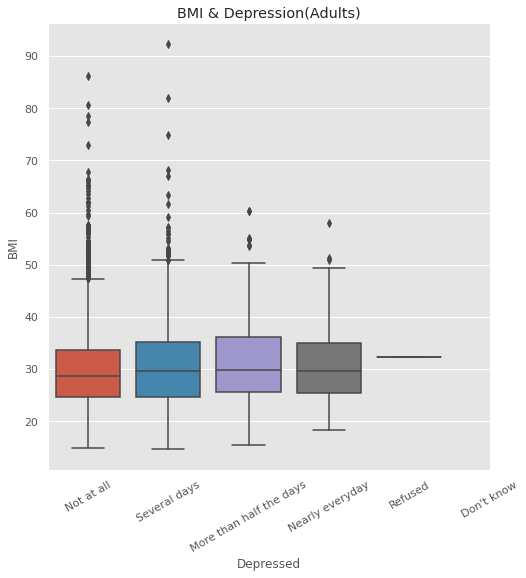

In [15]:
# BMI and Depression
sns.catplot(data=df_age_filter, x="Depressed", y="BMI", kind='box', height=7)
plt.title("BMI & Depression(Adults)")
plt.xticks([0,1,2,3,4,5],['Not at all','Several days','More than half the days','Nearly everyday','Refused',"Don't know"], rotation=30)
plt.show()

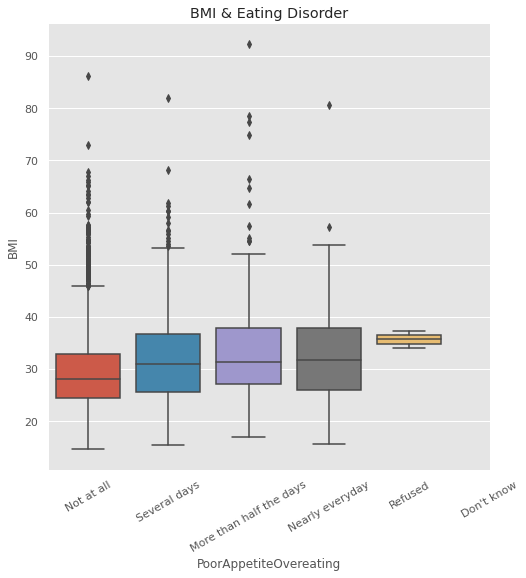

In [16]:
# BMI and Eating Disorder
sns.catplot(data=df_age_filter, x="PoorAppetiteOvereating", y="BMI", kind='box', height=7)
plt.title("BMI & Eating Disorder")
plt.xticks([0,1,2,3,4,5],['Not at all','Several days','More than half the days','Nearly everyday','Refused',"Don't know"], rotation=30)
plt.show()

#### Creating a column indicates the weight level based on CDC BMI guideline.

In [17]:
obese_condition = [(df_age_filter['BMI'] < 18.5),
                   (df_age_filter['BMI'] >= 18.5) & (df_age_filter['BMI'] < 25.0),
                   (df_age_filter['BMI'] >= 25.0) & (df_age_filter['BMI'] < 30.0),
                   (df_age_filter['BMI'] > 30.0)]

# 1 - Under Weight
# 2 - Healthy
# 3 - Overweight
# 4 - Obese
obese_value = [1, 2, 3, 4]

df_age_filter['obesity'] = np.select(obese_condition, obese_value, default = 1)

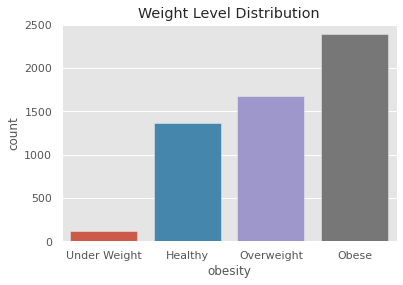

In [18]:
# Obesity distribution plot
sns.countplot(x='obesity', data=df_age_filter)
plt.title('Weight Level Distribution')
positions=(0, 1, 2, 3)
labels=("Under Weight", "Healthy", "Overweight", "Obese")
plt.xticks(positions, labels)
plt.show();

- From this distribution plot of weight level, we can see that our data are not balanced. We have majority of the respondents in the overweight and obese level.

In [19]:
import collections
from collections import Counter

In [20]:
count = Counter(df_age_filter['obesity'])
print(count)

Counter({4: 2392, 3: 1676, 2: 1365, 1: 123})


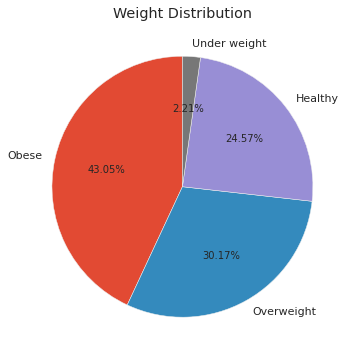

In [21]:
plt.figure(figsize=(6, 6))
labels = ['Obese','Overweight', 'Healthy', 'Under weight']
plt.pie([float(count[v]) for v in count], labels=labels, startangle = 90, autopct='%1.2f%%')

plt.title('Weight Distribution')
plt.show()

- From the pie plot, we can see that Obese group contains 43.05% of the respondents data(20~60 years old), 30.17% of them are overweight.
- To make the data balanced, we choose to combine respondents in the underweight, healthy, and overweight level as "Not Obese", and keep the "Obese" group the same.

In [22]:
# Second Weight Level Column
obese_condition_2 = [(df_age_filter['BMI'] < 30.0),
                   (df_age_filter['BMI'] > 30.0)]

# 1 - Not Obese
# 2 - Obese
obese_value_2 = [1, 2]

df_age_filter['obesity2'] = np.select(obese_condition_2, obese_value_2, default = 1)

In [23]:
df_age_filter.drop(['obesity'], axis=1, inplace=True)

In [24]:
df_age_filter.head()

,SEQN,Gender,Age,Race,CountryofBirth,Education,FamIncomeRatio,Weight,Height,BMI,Diabetes,ModerateWorkActivity,ModerateRecreationalActivities,Depressed,PoorAppetiteOvereating,Smoking,SleepHoursWeekdays,SleepHoursWeekend,obesity2
3,109266,2,29,6,2,5.0,5.000000,97.1,160.2,37.8,2,2.0,1.0,5.397605e-79,5.397605e-79,2.0,7.5,8.0,2
8,109271,1,49,3,1,2.0,2.582679,98.8,182.3,29.7,2,1.0,2.0,1.000000e+00,5.397605e-79,1.0,10.0,13.0,1
10,109273,1,36,3,1,4.0,0.830000,74.3,184.2,21.9,2,2.0,1.0,2.000000e+00,2.000000e+00,1.0,6.5,8.0,1
21,109284,2,44,1,2,2.0,2.582679,91.1,152.7,39.1,2,2.0,2.0,5.397605e-79,5.397605e-79,2.0,8.0,10.0,2
23,109286,2,33,6,2,5.0,1.360000,72.6,158.4,28.9,2,2.0,2.0,5.397605e-79,5.397605e-79,2.0,8.5,9.0,1


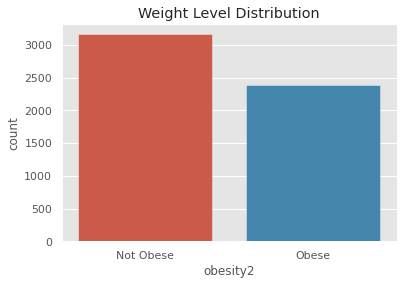

In [25]:
# Obesity distribution plot
sns.countplot(x='obesity2', data=df_age_filter)
plt.title('Weight Level Distribution')
positions=(0, 1)
labels=("Not Obese", "Obese")
plt.xticks(positions, labels)
plt.show();

- Now we can see that the data are more balanced.

### Visualization After Combine Weight Groups

---
https://public.tableau.com/views/Book1_16381205995830/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link 






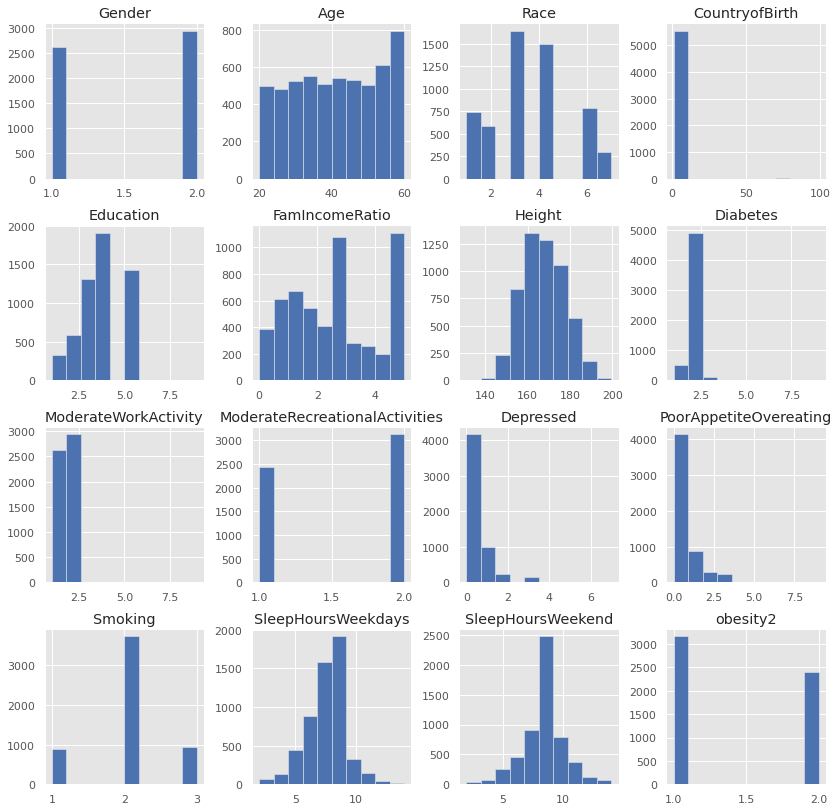

In [95]:
# Histogram
p = df_age_filter.hist(figsize=(14,14),color='b')

### Now we check the correlation

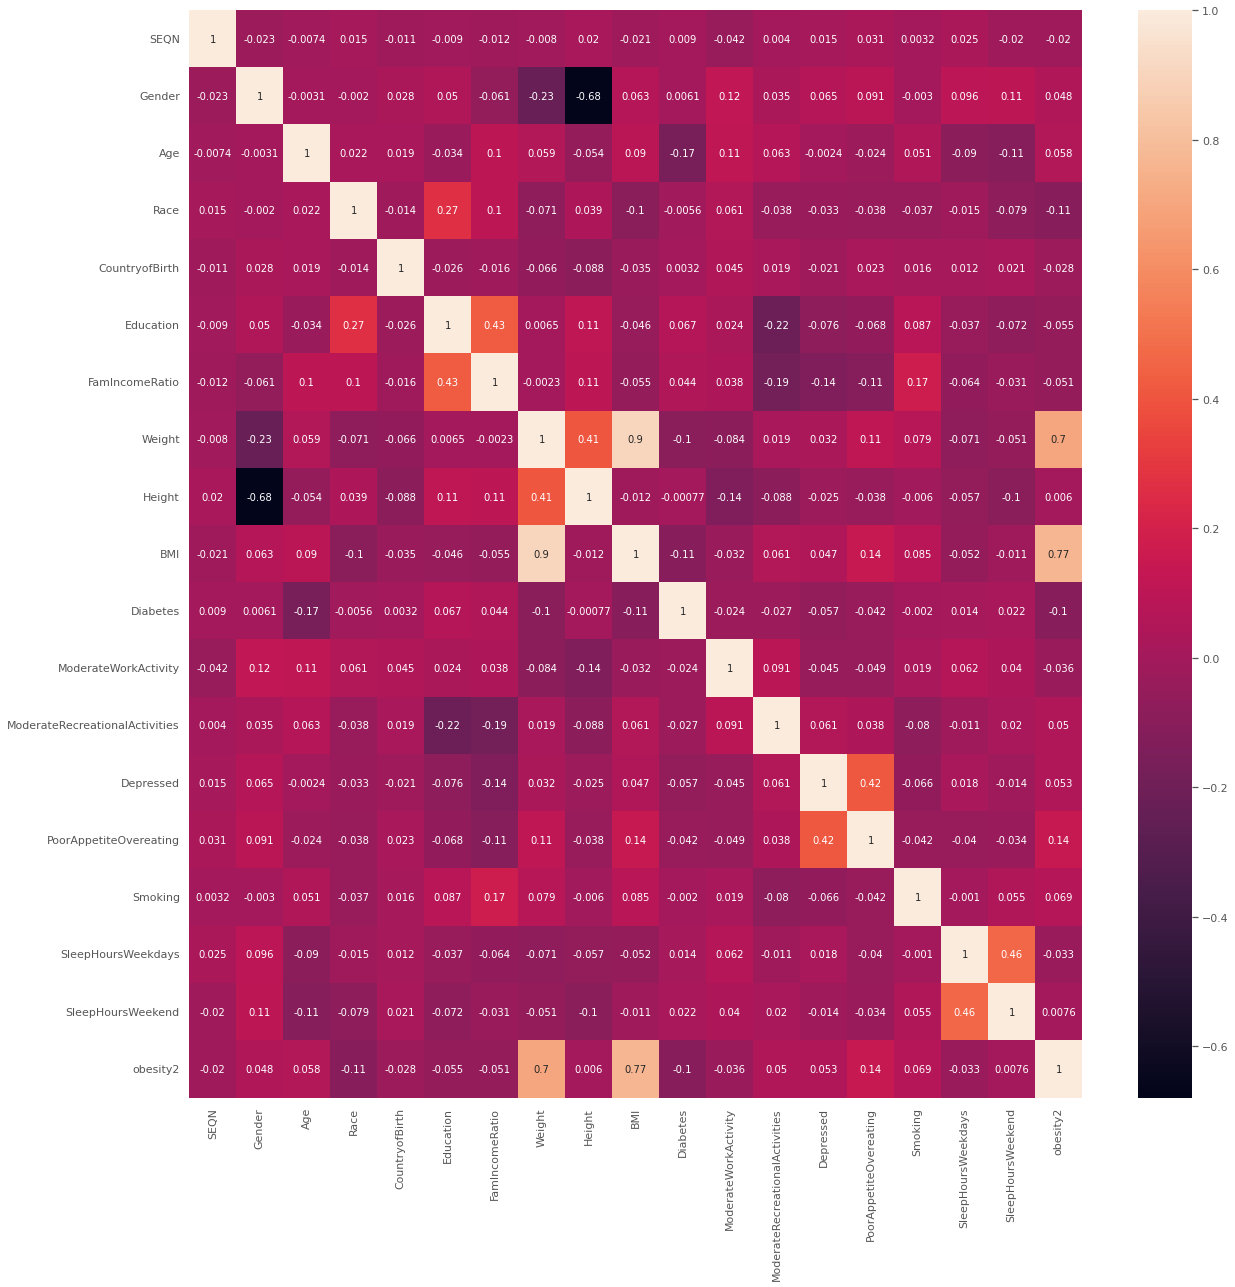

In [26]:
plt.figure(figsize=(20,20))
sns.heatmap(df_age_filter.corr(), annot=True);

- Obesity is highly correlated to Weight and BMI, we decided to drop both of them to get a better idea of how other factors effect obesity level.

In [27]:
df_age_filter.drop(['BMI'], axis=1, inplace=True)
df_age_filter.drop(['Weight'], axis=1, inplace=True)
df_age_filter.drop(['SEQN'], axis=1, inplace=True) #Drop the ID column

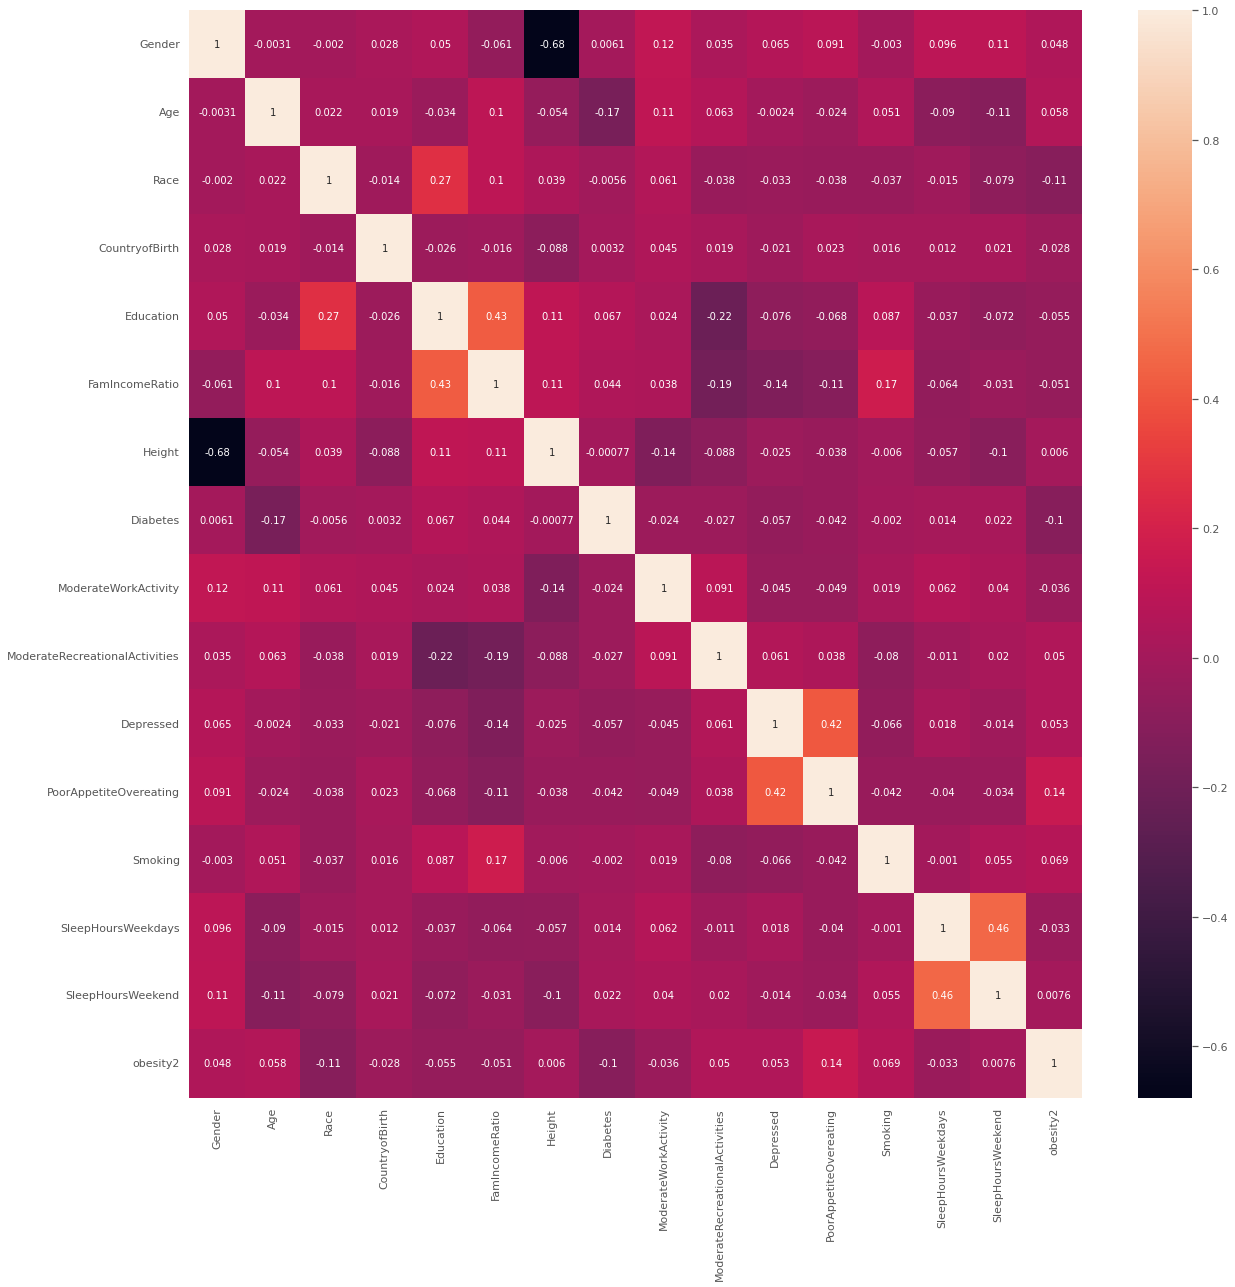

In [28]:
plt.figure(figsize=(20,20))
sns.heatmap(df_age_filter.corr(), annot=True);

- After removing BMI and Weight, we can see that obesity level related to poorappetite/overeating, diabetes, race. 

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

### Normalizing data
- Normalize data using MinMaxScaler, because our data are measured in different scales for each column. We need to normalize the data in order to construct and run the models.

In [30]:
#normalizing the data
scaler = MinMaxScaler(feature_range = (0,1))
normalized_data = scaler.fit_transform(df_age_filter)
columns = ['Gender',	'Age',	'Race',	'CountryofBirth',	'Education',	'FamIncomeRatio', 'Height',	'Diabetes',	'ModerateWorkActivity', 'ModerateRecreationalActivities',	'Depressed',	'PoorAppetiteOvereating',	'Smoking',	'SleepHoursWeekdays',	'SleepHoursWeekend', 'obesity2']
normalized_df = pd.DataFrame(normalized_data, columns=columns)
normalized_df['obesity2'] = normalized_df['obesity2'].astype(int)
normalized_df.head()

,Gender,Age,Race,CountryofBirth,Education,FamIncomeRatio,Height,Diabetes,ModerateWorkActivity,ModerateRecreationalActivities,Depressed,PoorAppetiteOvereating,Smoking,SleepHoursWeekdays,SleepHoursWeekend,obesity2
0,1.0,0.225,0.833333,0.010204,0.500,1.000000,0.424818,0.125,0.125,0.0,0.000000,0.000000,0.5,0.458333,0.500000,1
1,0.0,0.725,0.333333,0.000000,0.125,0.516536,0.747445,0.125,0.000,1.0,0.142857,0.000000,0.0,0.666667,0.916667,0
2,0.0,0.400,0.333333,0.000000,0.375,0.166000,0.775182,0.125,0.125,0.0,0.285714,0.222222,0.0,0.375000,0.500000,0
3,1.0,0.600,0.000000,0.010204,0.125,0.516536,0.315328,0.125,0.125,1.0,0.000000,0.000000,0.5,0.500000,0.666667,1
4,1.0,0.325,0.833333,0.010204,0.500,0.272000,0.398540,0.125,0.125,1.0,0.000000,0.000000,0.5,0.541667,0.583333,0


In [31]:
#from google.colab import files
#normalized_df.to_csv('normalized_df.csv') 
#files.download('normalized_df.csv')

## Modeling

In [32]:
# splitting test and train data
X = normalized_df.iloc[:, :-1]
Y = normalized_df.iloc[:, -1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

#### Baseline model

DummyClassifier is a classfier that makes prediction using simple rules. We use this to build a baselin emodel to compare with other models.

In [33]:
# Baseline classification accuracy
from sklearn.dummy import DummyClassifier

baseline_classifier = DummyClassifier(strategy = "most_frequent")
baseline_classifier.fit(X_train,Y_train)

# predicting
Y_pred_base = baseline_classifier.predict(X_test)

# accuracy calculation
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred_base))

Accuracy: 0.5764388489208633


- The baseline accuracy is 57.64%, which indicates the lowest possible prediction we can get. We expecting get high accuracy from the models we selected.

### SVM Model

In [34]:
# SVM Model
svm_clf = SVC(kernel='rbf',probability=True)
svm_clf.fit(X_train, Y_train)

# Predicting the Test set results
Y_pred_svm = svm_clf.predict(X_test)

In [35]:
# accuracy calculation
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred_svm))

Accuracy: 0.6348920863309353


In [36]:
# cross validation
from sklearn.model_selection import cross_val_score

cv_svm = cross_val_score(svm_clf, X, Y, scoring='accuracy', cv=10)
cv_svm = pd.Series(cv_svm)
cv_svm.mean()

0.6090615075507162

- Auccracy of SVM is 63.49%, and the cross-validation score is 60.91%. 

In [37]:
# classification report
print(classification_report(Y_test, Y_pred_svm))

              precision    recall  f1-score   support

           0       0.63      0.87      0.73       641
           1       0.64      0.32      0.43       471

    accuracy                           0.63      1112
   macro avg       0.64      0.59      0.58      1112
weighted avg       0.64      0.63      0.60      1112



- The recall rate of SVM model is 64%, and the false positive rate is 87% which indicates the model does not have a good fit.

### Logistic Regression Model
- Using Logit from statsmodels


In [38]:
#Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)
Y_pred_log = log_reg.predict(X_test)

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_log))

Accuracy: 0.6133093525179856


In [39]:
# cross validation
from sklearn.model_selection import cross_val_score

cv_logreg = cross_val_score(log_reg, X, Y, scoring='accuracy', cv=10)
cv_logreg = pd.Series(cv_logreg)
cv_logreg.mean()

0.6061812171884113

- The accuracy is 61.33%, cross-validation is 60.62%, the accuracy and cross-validation score are not high, but they are close to each other.

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_pred_log)
print(confusion_matrix)

[[518 123]
 [307 164]]


- From this result, we have 518 + 164 correct prediction, and 307 + 123 incorrect prediction by using logistic regression model.

In [41]:
# classification report
print(classification_report(Y_test, Y_pred_log))

              precision    recall  f1-score   support

           0       0.63      0.81      0.71       641
           1       0.57      0.35      0.43       471

    accuracy                           0.61      1112
   macro avg       0.60      0.58      0.57      1112
weighted avg       0.60      0.61      0.59      1112



- The recall rate is 57%, and the false positive rate is 71%. Which shows this is not a good model for our dataset.

### Decision Tree Model

In [42]:
# Decision Tree Model
dt_clf = DecisionTreeClassifier()

dt_clf = dt_clf.fit(X_train, Y_train)

Y_pred_dt = dt_clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred_dt))

Accuracy: 0.5746402877697842


In [43]:
cv_dt = cross_val_score(dt_clf, X, Y, scoring='accuracy', cv=10)
cv_dt = pd.Series(cv_dt)
cv_dt.mean()

0.5696457968760128

- Decision Tree Model result shows the accuracy is 57.46%. 

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_pred_dt)
print(confusion_matrix)

[[403 238]
 [235 236]]


In [45]:
# classification report
print(classification_report(Y_test, Y_pred_dt))

              precision    recall  f1-score   support

           0       0.63      0.63      0.63       641
           1       0.50      0.50      0.50       471

    accuracy                           0.57      1112
   macro avg       0.56      0.56      0.56      1112
weighted avg       0.58      0.57      0.57      1112



- The recall rate is 50%, false positive rate is 63%

### Random Forest Model

In [46]:
# Random Forest Model
rand_forest = RandomForestClassifier(random_state=42)
rand_forest.fit(X_train,Y_train)

Y_pred_rf = rand_forest.predict(X_test)
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred_rf))

Accuracy: 0.6339928057553957


In [47]:
cv_rf = cross_val_score(rand_forest, X, Y, scoring='accuracy', cv=10)
cv_rf = pd.Series(cv_rf)
cv_rf.mean()

0.6362376045109859

In [48]:
# classification report
print(classification_report(Y_test, Y_pred_rf))

              precision    recall  f1-score   support

           0       0.66      0.77      0.71       641
           1       0.59      0.45      0.51       471

    accuracy                           0.63      1112
   macro avg       0.62      0.61      0.61      1112
weighted avg       0.63      0.63      0.62      1112



- The accuracy score from Random Forest model as 63.40%.


### Random Forest using GridSearchCV

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [50]:
# splitting test and train data
X = normalized_df.iloc[:, :-1]
Y = normalized_df.iloc[:, -1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [51]:
model_rf_sm = RandomForestClassifier(random_state=42)

In [52]:
# Random Forest Model with SMOTE and using GridSearch to find the best model
param_test = {'n_estimators':[10, 50, 100],'max_depth':[3, 6, 7]} # we got 100 for the bestmodel_1
# param_test = {'n_estimators':[50, 85, 100],'max_depth':[3, 6, 7]} # we got 85 for bestmodel_2
# param_test = {'n_estimators':[85, 90, 95],'max_depth':[3, 6, 7]}    # we got 95 for bestmodel_3
grid_search = GridSearchCV(model_rf_sm, param_grid=param_test, cv=10)
grid_search.fit(X_train, Y_train);

In [53]:
# Find the best model and parameters with GridsearcCV
best_model = grid_search.best_estimator_
best_model

RandomForestClassifier(max_depth=6, n_estimators=50, random_state=42)

In [54]:
# Random Forest Using the best model
bestmodel_1 = RandomForestClassifier(max_depth=6, n_estimators=50, random_state=42)

bestmodel_1.fit(X_train,Y_train)

Y_pred = bestmodel_1.predict(X_test)
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.6501798561151079


In [55]:
from sklearn.model_selection import cross_val_score

cv_score_bestmodel_1 = cross_val_score(bestmodel_1, X, Y, scoring='accuracy',cv=10)
cv_score_bestmodel_1.mean()

0.6339020675351611

In [56]:
bestmodel_2 = RandomForestClassifier(max_depth=6, n_estimators=85, random_state=42)

bestmodel_2.fit(X_train,Y_train)

Y_pred = bestmodel_2.predict(X_test)
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.6573741007194245


In [57]:
cv_score_bestmodel_2 = cross_val_score(bestmodel_2, X, Y, scoring='accuracy',cv=10)
cv_score_bestmodel_2.mean()

0.6367810616371767

In [58]:
bestmodel_3 = RandomForestClassifier(max_depth=7, n_estimators=95,random_state=42)

bestmodel_3.fit(X_train,Y_train)

Y_pred = bestmodel_3.predict(X_test)
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.6591726618705036


In [59]:
from sklearn.model_selection import cross_val_score

cv_score_bestmodel_3 = cross_val_score(bestmodel_3, X, Y, scoring='accuracy',cv=10)
cv_score_bestmodel_3.mean()

0.6427163134357379

- The Bestmodel_3 with max_depth = 7, n_estimator = 95, random_state = 42 has the best accuracy, which is 65.92%. And the cross-validation score is 64.27%, which is really close to the accuracy score.

### XGBoosts

In [60]:
!pip install xgboost

In [61]:
import xgboost as xgb

In [62]:
from xgboost import XGBClassifier

In [63]:
# Train XGBoost Model
XGB_Model = XGBClassifier()
XGB_Model = XGB_Model.fit(X_train, Y_train)

In [64]:
# Predict test data
Y_pred_XGB = XGB_Model.predict(X_test)

# Print the accuracy 
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred_XGB))

Accuracy: 0.6492805755395683


- The XGBoost Model shows 64.93% accuracy, which is really close to the Random Forest Model from GridSearchCV.

In [65]:
cv_xgb = cross_val_score(XGB_Model, X, Y, scoring='accuracy', cv=10)
cv_xgb = pd.Series(cv_xgb)
cv_xgb.mean()

0.6347990796551948

In [66]:
# classification report
print(classification_report(Y_test, Y_pred_XGB))

              precision    recall  f1-score   support

           0       0.67      0.78      0.72       641
           1       0.61      0.47      0.53       471

    accuracy                           0.65      1112
   macro avg       0.64      0.63      0.63      1112
weighted avg       0.64      0.65      0.64      1112



#### Comments about accuracy:
- The baseline model shows 57.64% accuracy.
- Random Forest model with no tuning shows 63.40% accuracy. 
- XGBoost model shows 64.93% accuracy, which is higher than the random forest model without tuning. 

### Precision-Recall Curves

---
Precision-Recall Curves is used to evaluate the performance of binary classification algorithms.
Precision is a ratio of the number of true positives divided by the sum of the true positives and false positives. It describes how good a model is at predicting the positive class. Precision is referred to as the positive predictive value. 


In [67]:
# Rerun Models and Get the Predict Probabilities
model_svm = svm_clf.fit(X_train, Y_train)
probs_svm = model_svm.predict_proba(X_test)[:, 1]

model_lr = log_reg.fit(X_train, Y_train)
probs_lr = model_lr.predict_proba(X_test)[:, 1] # keep the probabilities for positive outvcomes

model_dt = dt_clf.fit(X_train, Y_train)
probs_dt = model_dt.predict_proba(X_test)[:, 1]

model_rf = rand_forest.fit(X_train,Y_train)
probs_rf = model_rf.predict_proba(X_test)[:, 1]

model_xgb = XGB_Model.fit(X_train, Y_train)
probs_xgb = model_xgb.predict_proba(X_test)[:, 1]

In [68]:
from sklearn.metrics import auc, precision_recall_curve

# calculate precision and recall for each model
precision_svm, recall_svm, _ = precision_recall_curve(Y_test, probs_svm)
auc_svm = auc(recall_svm, precision_svm)

precision_lr, recall_lr, _ = precision_recall_curve(Y_test, probs_lr)
auc_lr = auc(recall_lr, precision_lr)

precision_dt, recall_dt, _ = precision_recall_curve(Y_test, probs_dt)
auc_dt = auc(recall_dt, precision_dt)

precision_rf, recall_rf, _  = precision_recall_curve(Y_test, probs_rf)
auc_rf = auc(recall_rf, precision_rf)

precision_xgb, recall_xgb, _ = precision_recall_curve(Y_test, probs_xgb)
auc_xgb = auc(recall_xgb, precision_xgb)

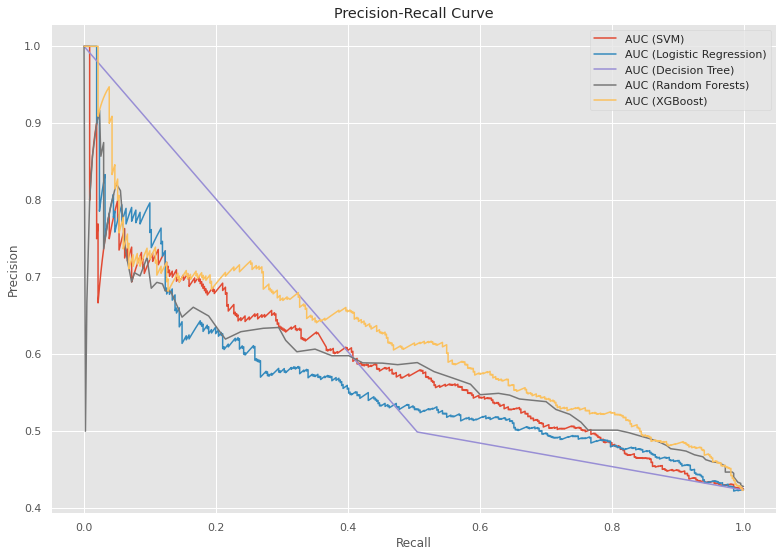

In [69]:
# plot the Precision-Recall Curves for each model
plt.figure(figsize=(13, 9))
plt.plot(recall_svm, precision_svm, label='AUC (SVM)')
plt.plot(recall_lr, precision_lr, label='AUC (Logistic Regression)')
plt.plot(recall_dt, precision_dt, label='AUC (Decision Tree)')
plt.plot(recall_rf, precision_rf, label='AUC (Random Forests)')
plt.plot(recall_xgb, precision_xgb, label='AUC (XGBoost)')

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [70]:
print(f'AUC of Logistic Regression: {auc_lr:.2f}')
print(f'AUC of SVM: {auc_svm:.2f}')
print(f'AUC of Random Forest: {auc_rf:.2f}')
print(f'AUC of Decision Tree: {auc_dt:.2f}')
print(f'AUC of XGBoost: {auc_xgb:.2f}')

AUC of Logistic Regression: 0.56
AUC of SVM: 0.58
AUC of Random Forest: 0.58
AUC of Decision Tree: 0.61
AUC of XGBoost: 0.62


- From the Precision-Recall Curves, we can see that the XGBoost Model has the highest AUC values, whcih is 0.62. Same as the accuracy results, XGBoost have the best fit compared to other models.

### Parameter Tuning XGBoost Model

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [72]:
# splitting test and train data
X = normalized_df.iloc[:, :-1]
Y = normalized_df.iloc[:, -1]

In [73]:
XGB_Model = XGBClassifier()

In [74]:
# params={'max_depth': range(2,10,1),
        #'n_estimators': range(50, 200, 20),
        #'learning_rate': [0.1, 0.01, 0.05]
        #}

In [75]:
#grid_search = GridSearchCV(estimator=XGB_Model,
#                          param_grid = params,
 #                          scoring = 'accuracy',
  #                         n_jobs=5,
  #                         cv = 5,
   #                        verbose = True)

In [76]:
#grid_search.fit(X_train, Y_train)

In [77]:
#grid_search.best_estimator_

In [78]:
final_model = XGBClassifier(learning_rate=0.05, n_estimators=170)
final_fitted = final_model.fit(X_train, Y_train)

# Predict test data
final_pred = final_fitted.predict(X_test)

# Print the accuracy 
print("Accuracy:", metrics.accuracy_score(Y_test, final_pred))

# cross validation
cv_score_final = cross_val_score(final_fitted, X, Y, scoring='accuracy',cv=10)
print("Cross validation score:", cv_score_final.mean())

Accuracy: 0.6510791366906474
Cross validation score: 0.6410979324648389


- After tuning the parameters, the accuracy increased from 64.93% to 65.11%. Cross-validation score is close to the accuracy score.

### Save the model and predict test data

In [87]:
# loading library
import pickle

In [88]:
# create an iterator object with write permission - model.pkl
with open('model_pkl', 'wb') as files:
    pickle.dump(final_fitted, files)

In [89]:
# load saved model
with open('model_pkl' , 'rb') as f:
    model = pickle.load(f)

In [90]:
# check prediction
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1])

### Check the feature importance 


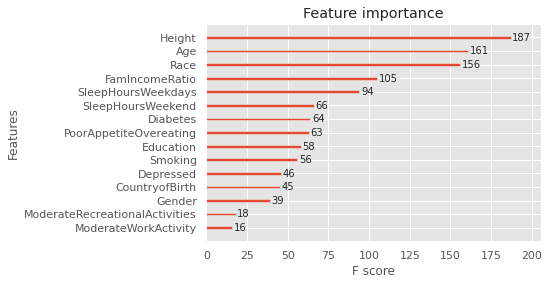

In [91]:
xgb.plot_importance(final_fitted)
plt.show()

- The most important six factors beside BMI and Weight are Height, Age, Race, Family income ratio, and Sleep hours on weekdays and weekend.

- In our literature reviews, we learned that depression can affect obesity level based on available studies. However, from our dataset and analysis, we found that "feeling depressed" and "poor appetite or overeating" may not be the top important features. Hence, based on our dataset and the results, we can not say that mental health is highly affecting obesity level.

- Overall, the XGBoost Model provides the best accuracy score compared to SVM, Decision Tree, Logistic Regression, and Random Forest model.